<a href="https://colab.research.google.com/github/nhwzaan/image_processing_and_applications/blob/main/20520855.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thông tin sinh viên
- Họ và tên: Nguyễn Thị Như Vân
- MSSV: 20520855
- Bài tập 1: 14/10/2023

# Kết nối với Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dir_monhoc = '/gdrive/MyDrive/UIT/CS406.O11.KHCL'
dir_baitap = os.path.join(dir_monhoc, "Baitap", "Baitap1")
dir_images = os.path.join(dir_baitap, "images")

# Yêu cầu 1: Đọc và hiển thị ảnh

## Đọc ảnh Lena.jpg

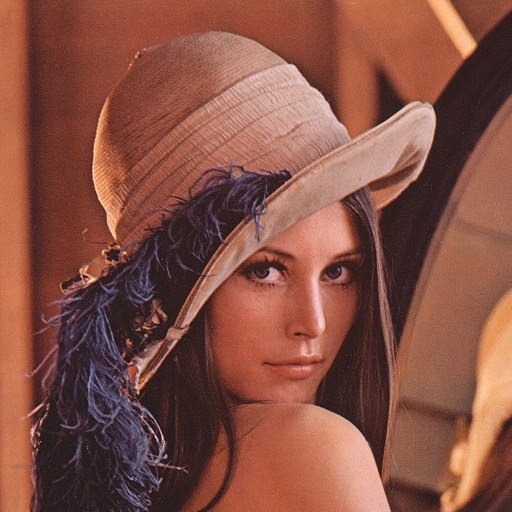

In [4]:
path_img_lena = os.path.join(dir_images, "lena.jpg")
img_lena = cv2.imread(path_img_lena)
cv2_imshow(img_lena)

## Hiển thị ảnh tương ứng với 3 thành phần màu: R, G, B

In [5]:
def display_single_channel(img):
  red_img_channel = img.copy()
  red_img_channel[:, :, 1] = 0
  red_img_channel[:, :, 2] = 0

  green_img_channel = img.copy()
  green_img_channel[:, :, 0] = 0
  green_img_channel[:, :, 2] = 0

  blue_img_channel = img.copy()
  blue_img_channel[:, :, 0] = 0
  blue_img_channel[:, :, 1] = 0


  return red_img_channel, green_img_channel, blue_img_channel

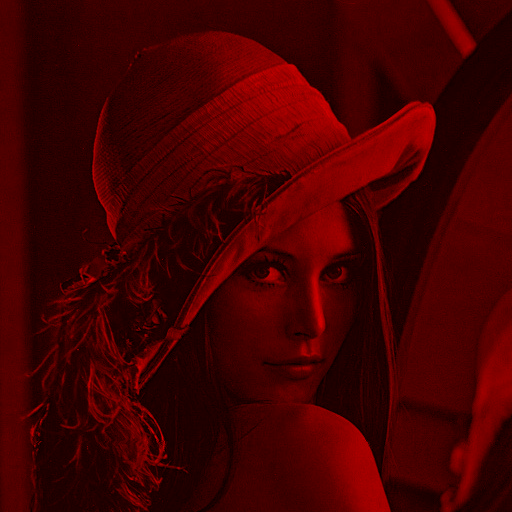

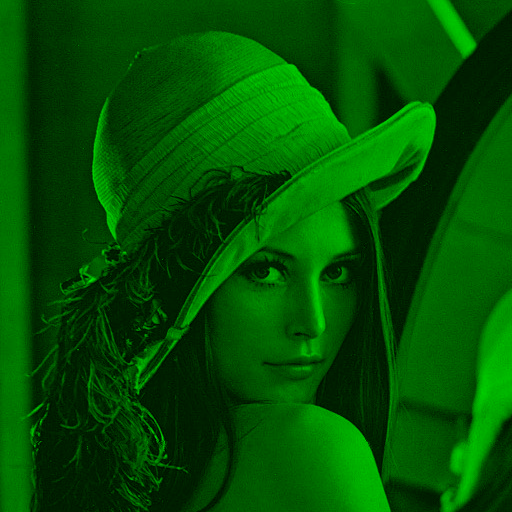

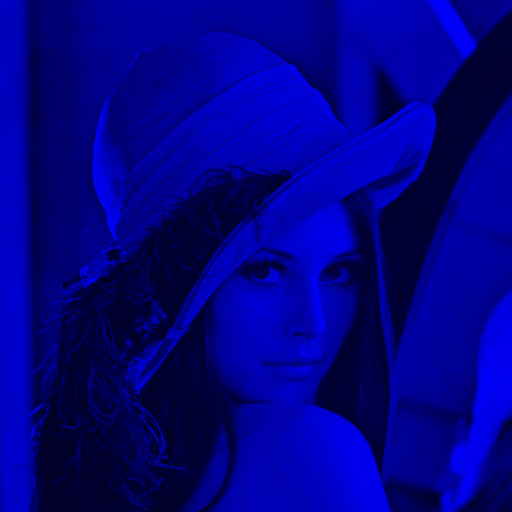

In [6]:
for img in display_single_channel(img_lena):
  cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Chuyển đổi ảnh sang ảnh mức xám và hiển thị ảnh kết quả

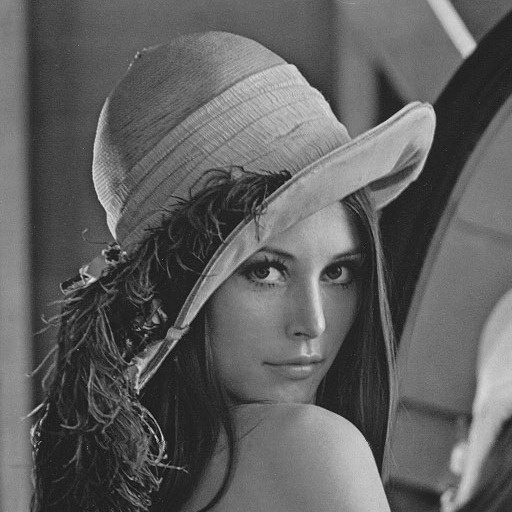

In [7]:
img_lena_gray = cv2.imread(path_img_lena, 0)
cv2_imshow(img_lena_gray)

## Chuyển đổi ảnh sang ảnh nhị phân và hiển thị ảnh kết quả

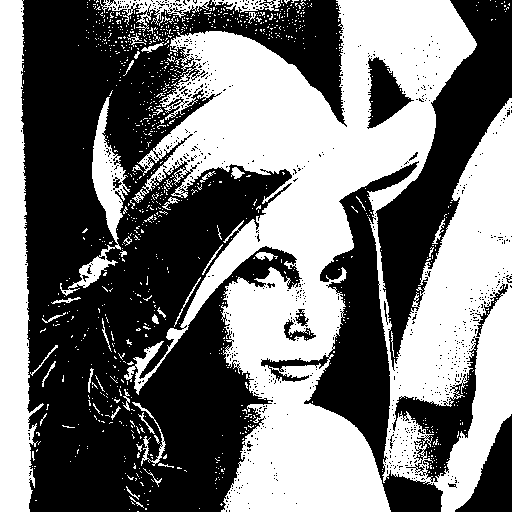

In [8]:
_, img_lena_binary = cv2.threshold(img_lena_gray, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(img_lena_binary)

# Yêu cầu 2: Tăng độ sáng và độ tương phản

## Hàm show 2 ảnh

In [9]:
def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize = (20, 20))
  plt.subplot(1, 2, 1)
  plt.title(title1)
  img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
  img_src = plt.imshow(img_src, interpolation = 'bicubic')

  plt.subplot(1, 2, 2)
  plt.title(title2)
  img_rst = cv2.cvtColor(img_rst, cv2.COLOR_BGR2RGB)
  img_rst = plt.imshow(img_rst, interpolation = 'bicubic')

In [10]:
path_img_forest = os.path.join(dir_images, "forest.tif")
img_forest = cv2.imread(path_img_forest)
path_img_field = os.path.join(dir_images, "field.jpg")
img_field = cv2.imread(path_img_field)

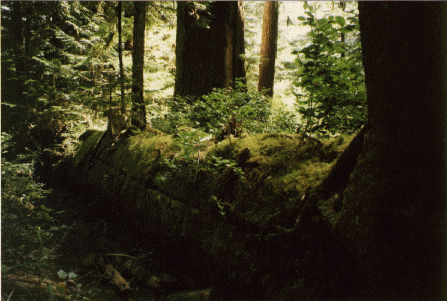

In [11]:
cv2_imshow(img_forest)

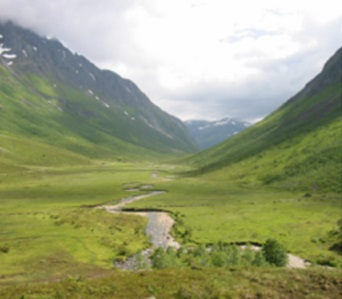

In [12]:
cv2_imshow(img_field)

## Hàm tăng độ sáng và độ tương phản

In [13]:
def increase_brightness_and_contrast(image, alpha, beta):
    adjusted_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return adjusted_image

## Test trên 2 ảnh field.jpg và forest.tif

alpha 1  beta 0      --> no change  
0 < alpha < 1        --> lower contrast  
alpha > 1            --> higher contrast  
-127 < beta < +127   --> good range for brightness values

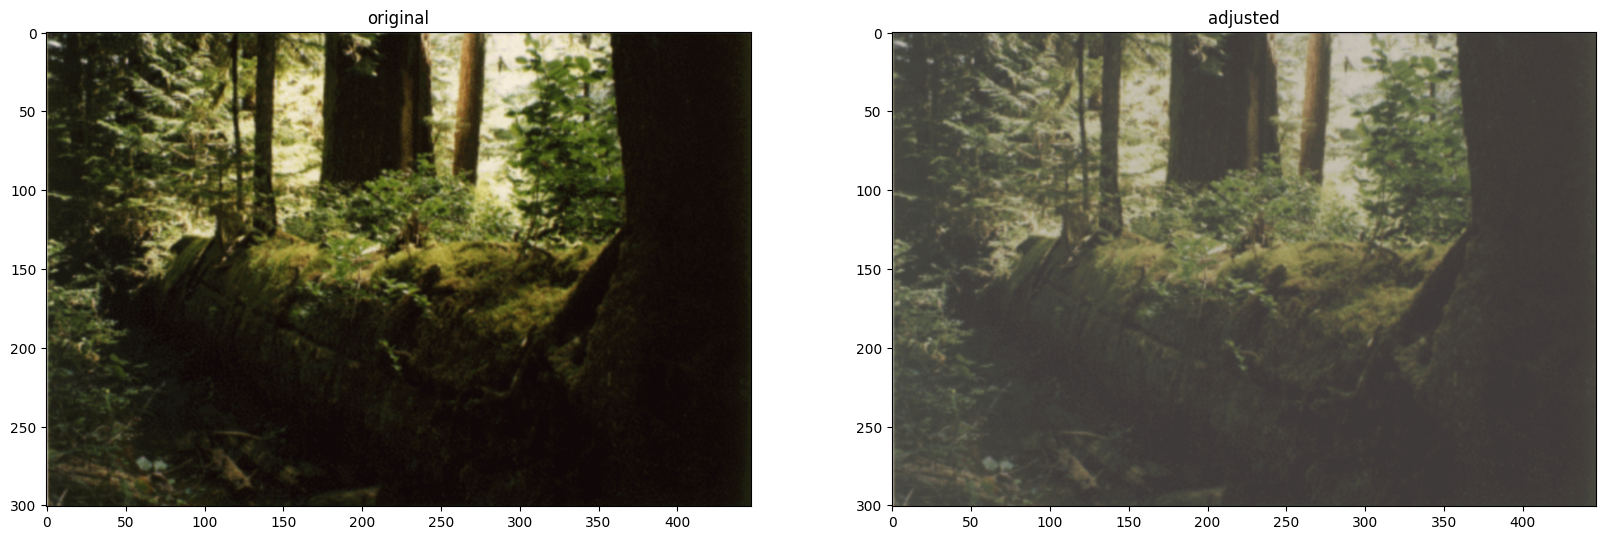

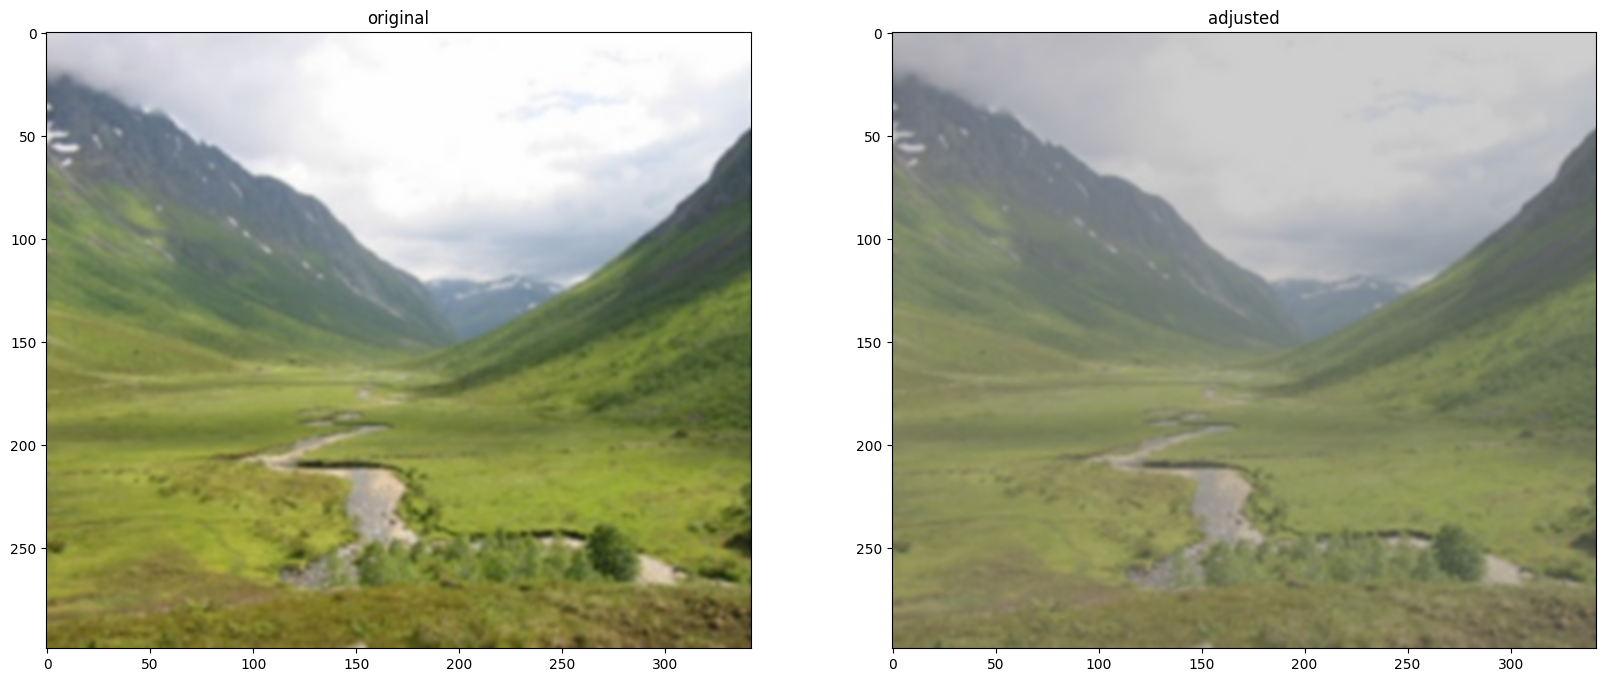

In [23]:
constrast = 0.6 # @param {type:"slider", max:10.0, min: 0.1, step:0.1}
brightness = 54# @param {type:"slider", max:255, min: -255, step:1}
adjusted_img_forest = increase_brightness_and_contrast(img_forest, constrast, brightness)
adjusted_img_field = increase_brightness_and_contrast(img_field, constrast, brightness)
show2image(img_forest, adjusted_img_forest, "original", "adjusted")
show2image(img_field, adjusted_img_field, "original", "adjusted")

# Yêu cầu 3: Áp dụng phép lấy ngưỡng cho ảnh

## Hàm apply threshold

In [15]:
def apply_threshold(image_path, threshold_value):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('original')

    plt.subplot(122)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'applied threshold {threshold_value}')
    plt.show()

## Test trên ảnh rice.png

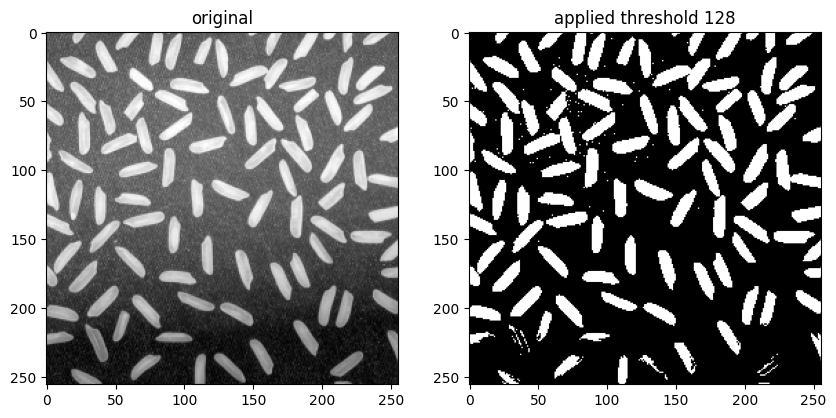

In [16]:
path_img_rice = os.path.join(dir_images, "rice.png")
img_rice = cv2.imread(path_img_rice)
threshold_value = 128
apply_threshold(path_img_rice, threshold_value)

# Yêu cầu 4: Invert cho ảnh

In [17]:
path_img_kids = os.path.join(dir_images, "kids.tif")
img_kids = cv2.imread(path_img_kids)

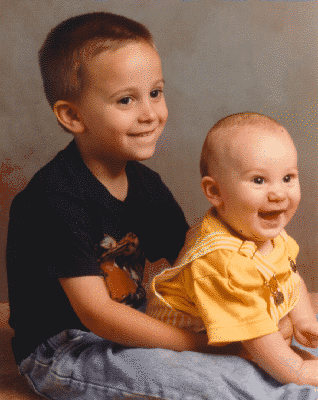

In [18]:
cv2_imshow(img_kids)

## Hàm invert ảnh

In [19]:
def invert_image(image):
    inverted_image = 255-image
    return inverted_image

## Test trên ảnh kids.tif

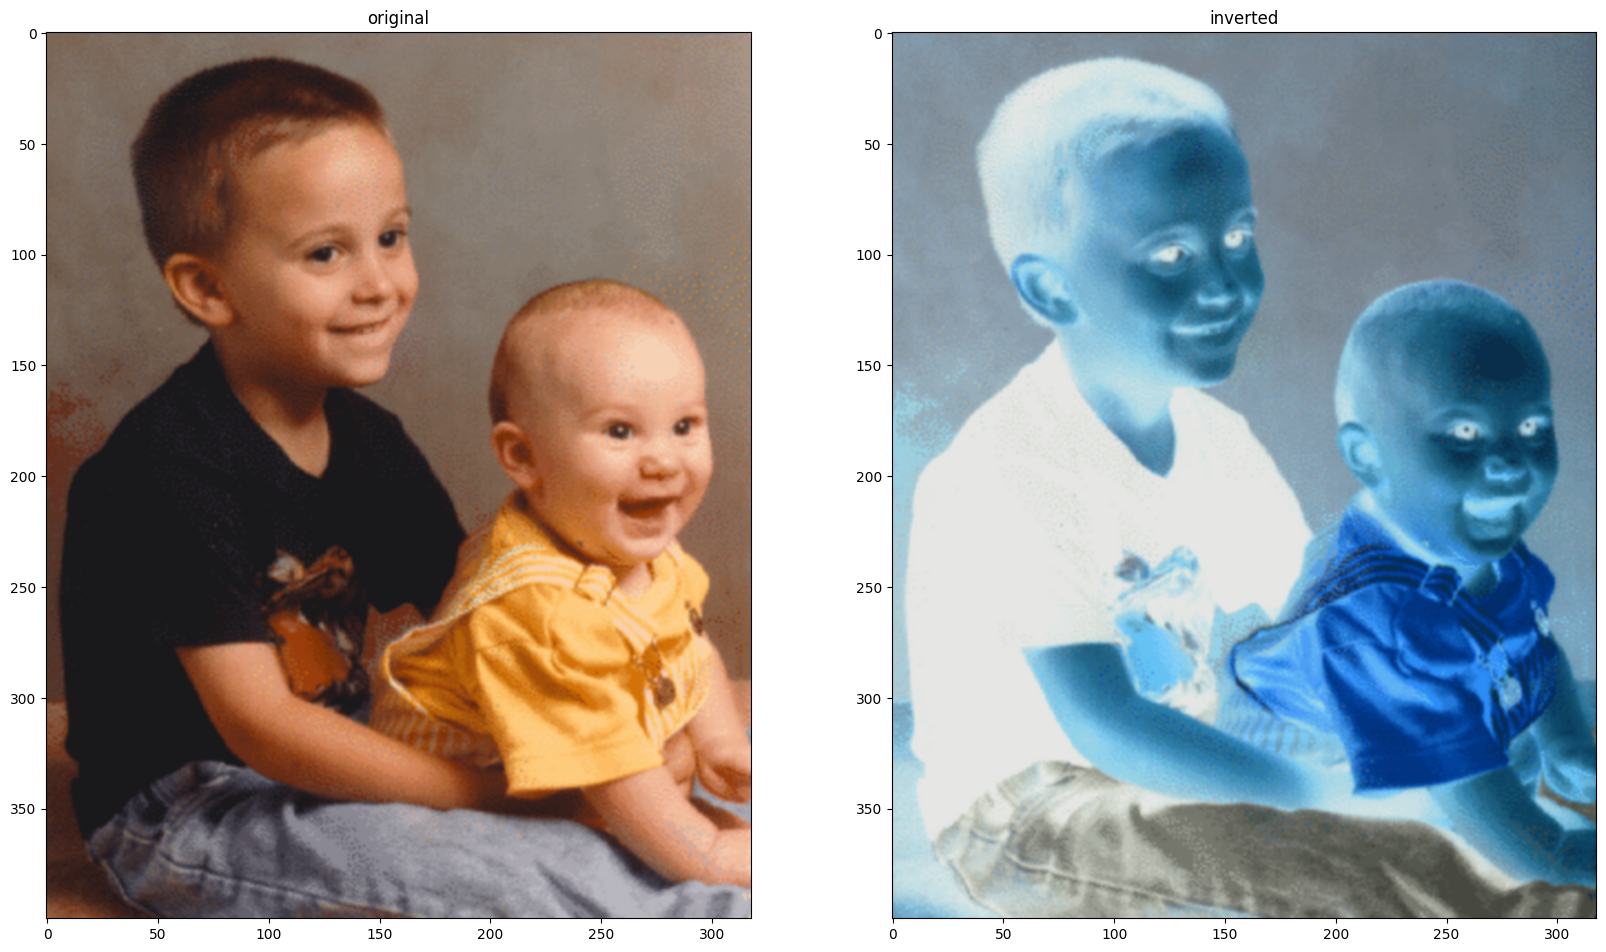

In [20]:
invert_kids = invert_image(img_kids)
show2image(img_kids, invert_kids, "original","inverted")